## Optimización de parámetros para Regresión Logistica

In [1]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_transformed.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.shape

(6435823, 16)

In [4]:
import numpy as np
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Registro del tiempo de inicio
start_time = time.time()

# 1. Utilizar el 100% del dataset
X = dataset_work_3.drop(columns=["MOROSIDAD"])
y = dataset_work_3["MOROSIDAD"]

# 2. Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Espacio de búsqueda para los hiperparámetros
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# 5. Inicializar el clasificador y RandomizedSearchCV
log_reg = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones a probar
    cv=3,  # Validación cruzada con 3 folds
    n_jobs=-1,  # Paralelismo
    verbose=2,
    random_state=42,
    scoring='roc_auc'
)

# 6. Ajustar el modelo con el dataset completo
random_search.fit(X_train, y_train)

# 7. Obtener los mejores parámetros
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

# 8. Entrenar el modelo final con todos los datos utilizando los mejores parámetros
best_params = random_search.best_params_
best_model = LogisticRegression(**best_params, random_state=42)

# Ajustar el modelo con los datos completos de entrenamiento
best_model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\hrqui\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py", line 11

Mejores parámetros encontrados:
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 3792.690190732246}

Matriz de Confusión:
[[859041 261798]
 [152713 657195]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81   1120839
           1       0.72      0.81      0.76    809908

    accuracy                           0.79   1930747
   macro avg       0.78      0.79      0.78   1930747
weighted avg       0.79      0.79      0.79   1930747

ROC AUC: 0.8794
El tiempo total de ejecución fue de 4 minutos y 5.37 segundos.


## **Matriz de Confusión con Mapa de Calor**

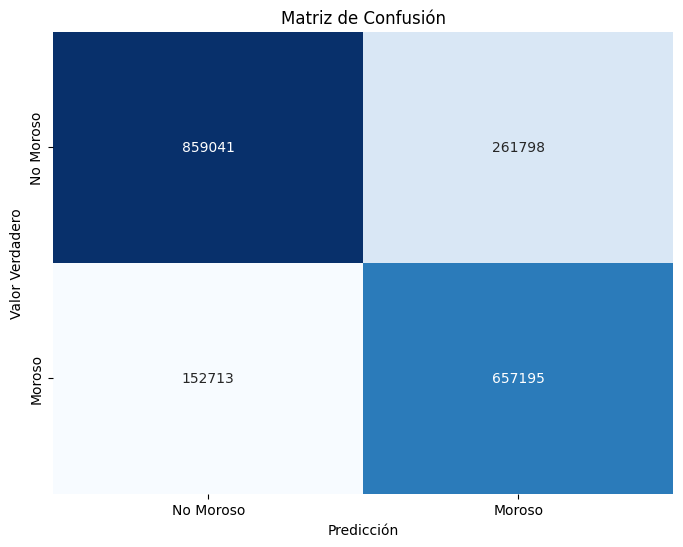

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Moroso', 'Moroso'], yticklabels=['No Moroso', 'Moroso'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Verdadero")
plt.show()